In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from IPython.display import display
import graphviz
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier



# Common things I do.  Combined here for reference

#### 1. Load a CSV into a Dataframe

In [2]:
df = pd.read_csv("data/data.csv")
df.shape

(5144, 145)

#### 2. Create a label column out of a feature

In [3]:
df["Winner"] = df["Winner"].astype('category')
df["label"] = df["Winner"].cat.codes
df.shape

(5144, 146)

#### 3. Dummify a dataframe

In [4]:
dummy_df = pd.get_dummies(df)
dummy_df.shape

(5144, 4095)

#### 4. Dummify a single feature.  Remove original feature.

In [5]:
single_feature_df = pd.get_dummies(df["weight_class"])
returned_df = pd.concat([df, single_feature_df], axis=1)
print(returned_df.shape)
returned_df = returned_df.drop('weight_class', axis=1)
returned_df.shape

(5144, 160)


(5144, 159)

#### 5. Filter out a certain value from a feature

In [6]:
df_no_draws = df[df['Winner'] != 'Draw']
df_no_draws.shape

(5061, 146)

#### 6. Remove rows that contain a null in a certain feature

In [7]:
df_stance = df[df['B_Stance'].notna()]
df_stance.shape

(4985, 146)

#### 7. Split a dataframe based on a date

In [8]:
#If it isn't a date we need to make it a date
df_date = df
df_date['date'] = pd.to_datetime(df_date['date'])
event_df = df_date[df_date['date'] == '05-04-19']
master_df = df_date[df_date['date'] != '05-04-19']
print(event_df.shape)
print(master_df.shape)

(12, 146)
(5132, 146)


#### 8. Create a dataframe containing only certain features of a parent dataframe

In [9]:
sub_df = df[['Winner', 'weight_class']]
sub_df.shape

(5144, 2)

#### 9. Train / Test Split with Dummification and filling na with 0

In [10]:
df_no_label = df_no_draws.drop(['label', 'date', 'Winner'], axis=1)
df_no_label = pd.get_dummies(df_no_label)
df_no_label.fillna(value=0, inplace=True)
X = df_no_label.values
y = df_no_draws["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=75)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1518, 3594)
(3543, 3594)
(1518,)
(3543,)


#### 10. Create a Machine Learning Model

In [11]:
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

#### 11. Run a machine learning classification model.  Get Predictions and probabilities of a test set

In [12]:
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
preds = model.predict(X_test)
#FYI this includes draws...
preds

array([2, 2, 0, ..., 0, 2, 2], dtype=int8)

#### 12. Get the column names from a dataframe

In [13]:
col_names = df.columns.values
col_names.shape

(146,)

#### 13. Add a full column to a dataframe

In [14]:
#Here we will add the probs column to the original dataframe.  Note probs is actually 3 columns because Blue, Draw, Red
X_test_with_probs = np.append(X_test, probs, 1)
X_test_with_probs.shape
print(X_test.shape)
print(X_test_with_probs.shape)

(3543, 3594)
(3543, 3596)


#### 14. Get the mean of a feature column

In [15]:
df['R_age'].mean()

29.44232283464567

#####  15. Fill na's with the average of the column


In [16]:
df_copy = df.copy()
display(df_copy['B_age'].isnull().any())
df_copy['B_age'] = df_copy['B_age'].fillna(df_copy['B_age'].mean())
display(df_copy['B_age'].isnull().any())
df_copy.shape


True

False

(5144, 146)

#### 16. Add an empty feature column to a dataframe

In [17]:
df_new_feature = df.copy()
df_new_feature['empty_feature'] = ''
df_new_feature.shape

(5144, 147)

#### 17. Visualize a decision tree

In [19]:
columns=list(df_no_label.columns)
dot_data = tree.export_graphviz(model,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image1",view=True)

'image1.pdf'

#### 18. Get info about the DataFrame Data Types (DTypes)

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 146 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   R_fighter                     object        
 1   B_fighter                     object        
 2   Referee                       object        
 3   date                          datetime64[ns]
 4   location                      object        
 5   Winner                        category      
 6   title_bout                    bool          
 7   weight_class                  object        
 8   no_of_rounds                  int64         
 9   B_current_lose_streak         float64       
 10  B_current_win_streak          float64       
 11  B_draw                        float64       
 12  B_avg_BODY_att                float64       
 13  B_avg_BODY_landed             float64       
 14  B_avg_CLINCH_att              float64       
 15  B_avg_CLINCH_landed           float64

#### 19. Get values counts of a feature

In [21]:
df["Winner"].value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

#### 20. Get full dataframe feature description

In [22]:
df.describe(include='all')

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,label
count,5144,5144,5121,5144,5144,5144,5144,5144,5144.000000,5144.000000,...,5144.000000,5144.000000,5144.000000,5010,5140.000000,4828.000000,5141.000000,4972.000000,5080.000000,5144.00000
unique,1334,1774,190,476,157,3,2,14,NaN,NaN,...,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Jim Miller,Jeremy Stephens,Herb Dean,2016-11-19 00:00:00,"Las Vegas, Nevada, USA",Red,False,Lightweight,NaN,NaN,...,NaN,NaN,NaN,Orthodox,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,19,726,25,1216,3470,4809,989,NaN,NaN,...,NaN,NaN,NaN,3807,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1993-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.119362,0.429821,...,0.777605,0.071345,3.598173,NaN,179.274089,183.664412,172.075861,29.171963,29.442323,1.36528
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.631457,0.731325,...,1.326056,0.277771,3.709519,NaN,8.638978,10.304375,35.164075,4.078538,4.141927,0.92228
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,152.400000,152.400000,115.000000,18.000000,19.000000,0.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,...,0.000000,0.000000,1.000000,NaN,172.720000,177.800000,145.000000,26.000000,26.000000,0.00000


#### 21. See data plotted by frequencey

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

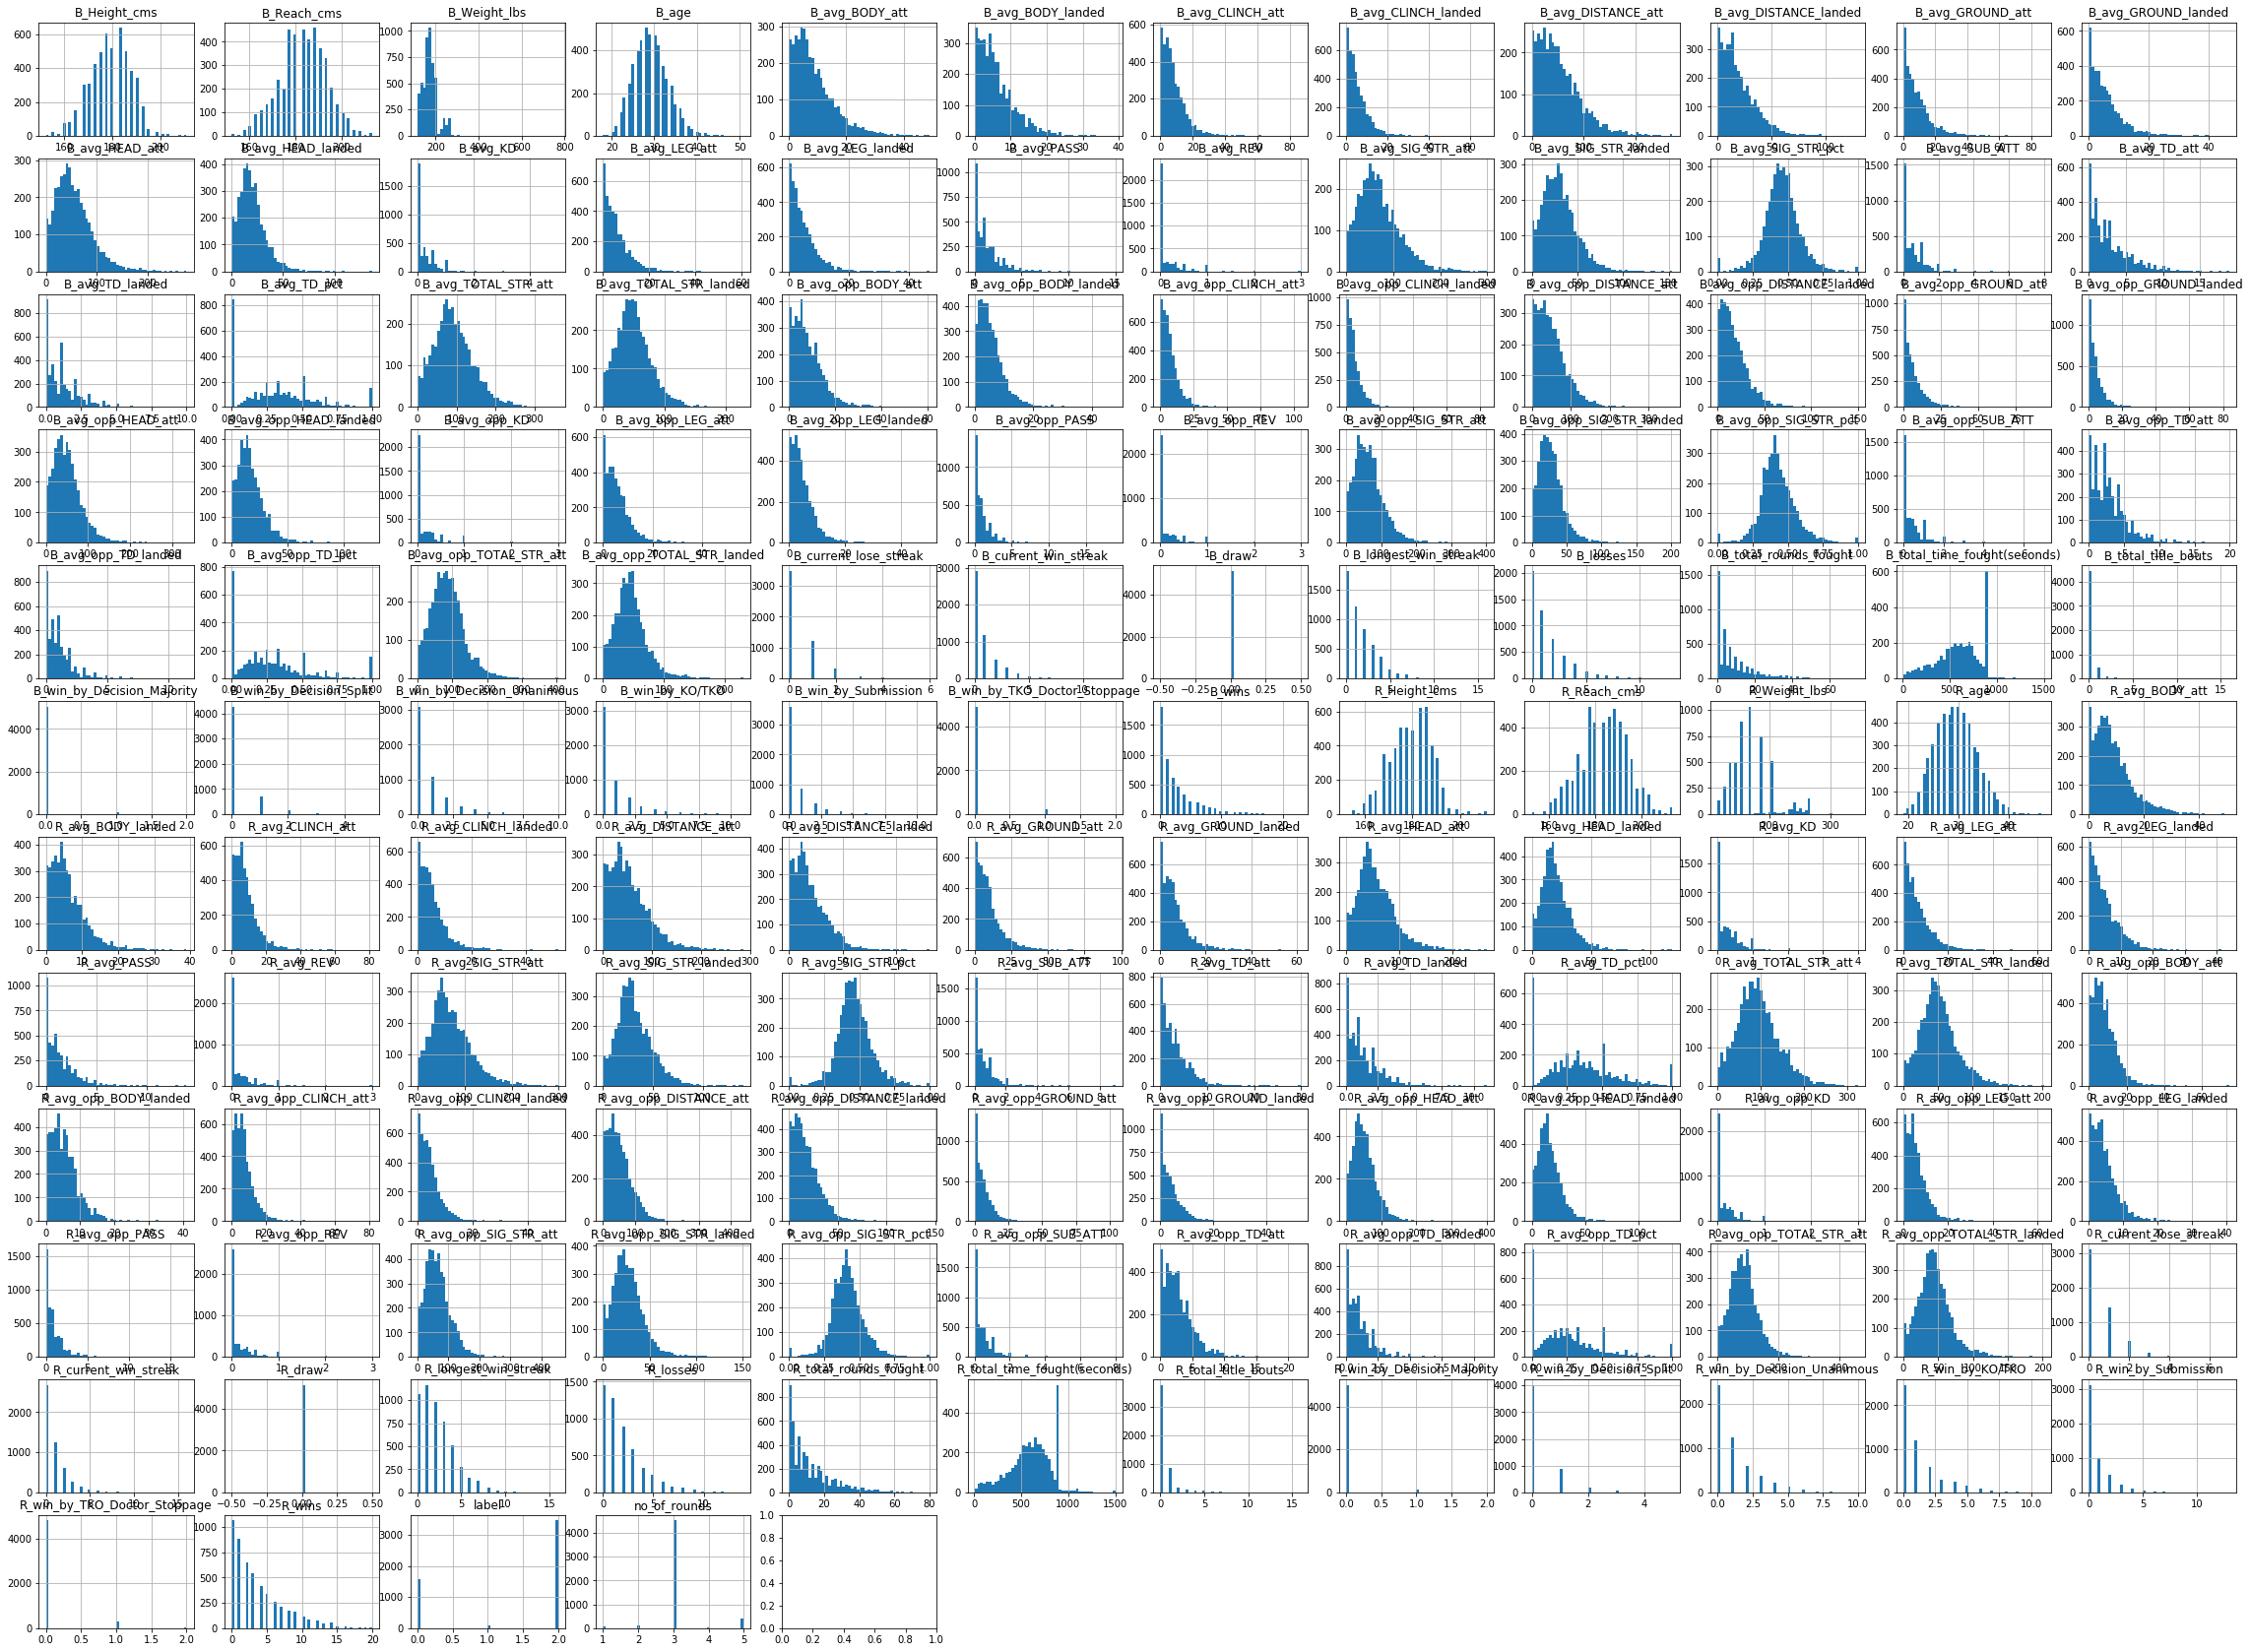

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(40,30))
plt.show()

#### 22. Get a correlation matrix

In [24]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                       1.000000
R_Weight_lbs                0.110097
R_avg_TD_pct                0.106301
B_Weight_lbs                0.099993
R_avg_GROUND_att            0.091644
                              ...   
R_losses                   -0.167675
R_avg_opp_HEAD_landed      -0.172168
R_avg_opp_SIG_STR_landed   -0.174634
B_draw                           NaN
R_draw                           NaN
Name: label, Length: 137, dtype: float64

#### 23. Visualize correlation between features in a scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F6EB22848>,
      dtype=object)

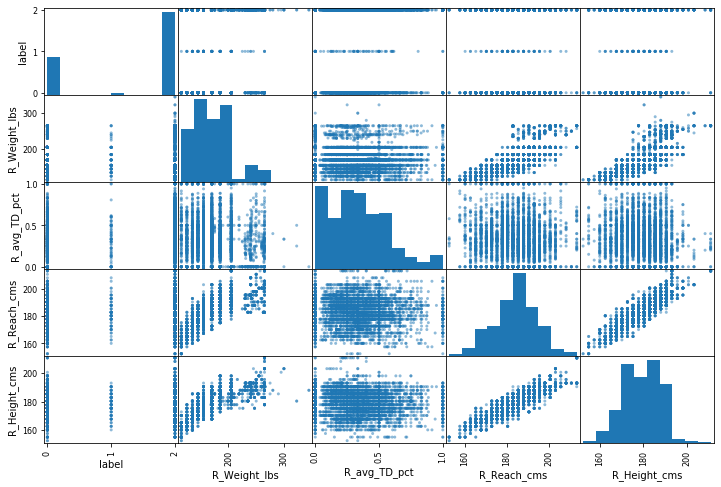

In [25]:
attributes = ["label", "R_Weight_lbs", "R_avg_TD_pct", "R_Reach_cms", "R_Height_cms"]
scatter_matrix(df[attributes], figsize=(12,8))

#### 24. Use cross-validation to test a model

In [26]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores) #Lower is better
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [1.12974147 1.24604638 1.19207912 1.19404463 1.21595553]
Mean: 1.1955734261034938
Standard deviation: 0.03823962086284976


#### 25. Do a grid search to find the 'best' parameters of a model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'min_samples_leaf': [1, 5, 10, 20], 'max_depth': [2, 4, 8, 16]}
]

grid_search=GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)


In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#### 26. Find the percent of each feature that is missing

In [ ]:
missing=(df.isnull().sum() / len(df)) *100
missing=missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing=pd.DataFrame({'Missing Ratio' :missing})
missing.head(40)

#### 27. Get heatmap of a DataFrame

In [ ]:
import seaborn as sns
corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

#### 28. Do weighted soft voting to combine a classification model

In [ ]:
model_1 = DecisionTreeClassifier()

model_1.fit(X_train, y_train)
probs_1 = model_1.predict_proba(X_test)

model_2 = DecisionTreeClassifier(max_depth=2)

model_2.fit(X_train, y_train)
probs_2 = model_2.predict_proba(X_test)

probs_combined = .5*probs_1 + .5*probs_2

print(probs_1)
print(probs_2)
print(probs_combined)


#### 29. Simple Bar Plot

In [ ]:
blue_wins = sum(df['Winner'] == 'Blue')
red_wins = sum(df['Winner'] == 'Red')

x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = ((blue_wins / (blue_wins + red_wins))*100, (red_wins / (blue_wins + red_wins))*100)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

### 30. Make a Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



class_names = ['Blue', 'Red']

titles_options= [(f"Total Confusion matrix", None),
                 ("Normalized confusion matrix", 'true')]

title = f"Confusion matrix"
normalize=None


disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize,
                             values_format='.5g'
                             )
disp.ax_.set_title(title)
plt.rcParams.update({'font.size': 16})
print(title)
print(disp.confusion_matrix)
plt.grid(False)
plt.show()    

cm = confusion_matrix(preds, y_test)
tp = cm[0][0] 
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
total = tp + tn + fp + fn
print(f"tp for total: {tp}")
print(f"tn: {tn}")
print(f"fp: {fp}")
print(f"fn: {fn}")
accuracy = (tp + tn) / total
precision = tp / (tp + fp)

true_positive = tp / (tp + fn)
print(f"The precision is: {precision}")
print(f"The accuracy is {accuracy}")
print(f"The prevalence of blue is {(tp + fn) / total}")
print(f"The true_positive rate for total is {true_positive}")